In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
DataFrame = pd.read_csv('Date and model wise sale.csv') 
DataFrame

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57
...,...,...,...
46111,01-Jan-14,M74,1
46112,01-Jan-14,M59,1
46113,01-Jan-14,M60,5
46114,01-Jan-14,M54,1


In [3]:
DataFrame.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

In [4]:
DataFrame['Date'] = pd.to_datetime(DataFrame['Date'])
DataFrame

,Date,Model,Count
0,2016-08-31,M45,5
1,2016-08-31,M121,3
2,2016-08-31,M122,4
3,2016-08-31,M91,10
4,2016-08-31,M66,57
...,...,...,...
46111,2014-01-01,M74,1
46112,2014-01-01,M59,1
46113,2014-01-01,M60,5
46114,2014-01-01,M54,1


In [5]:
DataFrame['Date'] = DataFrame['Date'].dt.strftime('%d.%m.%Y')
DataFrame['year'] = pd.DatetimeIndex(DataFrame['Date']).year
DataFrame['month'] = pd.DatetimeIndex(DataFrame['Date']).month
DataFrame['day'] = pd.DatetimeIndex(DataFrame['Date']).day
DataFrame['dayofyear'] = pd.DatetimeIndex(DataFrame['Date']).dayofyear
DataFrame['weekofyear'] = pd.DatetimeIndex(DataFrame['Date']).weekofyear
DataFrame['weekday'] = pd.DatetimeIndex(DataFrame['Date']).weekday
DataFrame['quarter'] = pd.DatetimeIndex(DataFrame['Date']).quarter
DataFrame['is_month_start'] = pd.DatetimeIndex(DataFrame['Date']).is_month_start
DataFrame['is_month_end'] = pd.DatetimeIndex(DataFrame['Date']).is_month_end
DataFrame

<ipython-input-5-9a424c441cb1>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  DataFrame['weekofyear'] = pd.DatetimeIndex(DataFrame['Date']).weekofyear


,Date,Model,Count,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end
0,31.08.2016,M45,5,2016,8,31,244,35,2,3,False,True
1,31.08.2016,M121,3,2016,8,31,244,35,2,3,False,True
2,31.08.2016,M122,4,2016,8,31,244,35,2,3,False,True
3,31.08.2016,M91,10,2016,8,31,244,35,2,3,False,True
4,31.08.2016,M66,57,2016,8,31,244,35,2,3,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
46111,01.01.2014,M74,1,2014,1,1,1,1,2,1,True,False
46112,01.01.2014,M59,1,2014,1,1,1,1,2,1,True,False
46113,01.01.2014,M60,5,2014,1,1,1,1,2,1,True,False
46114,01.01.2014,M54,1,2014,1,1,1,1,2,1,True,False


In [6]:
DataFrame = pd.get_dummies(DataFrame, columns=['year'], drop_first=True, prefix='year')

DataFrame = pd.get_dummies(DataFrame, columns=['month'], drop_first=True, prefix='month')

DataFrame = pd.get_dummies(DataFrame, columns=['weekday'], drop_first=True, prefix='wday')
DataFrame = pd.get_dummies(DataFrame, columns=['quarter'], drop_first=True, prefix='qrtr')

DataFrame = pd.get_dummies(DataFrame, columns=['is_month_start'], drop_first=True, prefix='m_start')

DataFrame = pd.get_dummies(DataFrame, columns=['is_month_end'], drop_first=True, prefix='m_end')

DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          46116 non-null  object
 1   Model         46116 non-null  object
 2   Count         46116 non-null  int64 
 3   day           46116 non-null  int64 
 4   dayofyear     46116 non-null  int64 
 5   weekofyear    46116 non-null  int64 
 6   year_2015     46116 non-null  uint8 
 7   year_2016     46116 non-null  uint8 
 8   month_2       46116 non-null  uint8 
 9   month_3       46116 non-null  uint8 
 10  month_4       46116 non-null  uint8 
 11  month_5       46116 non-null  uint8 
 12  month_6       46116 non-null  uint8 
 13  month_7       46116 non-null  uint8 
 14  month_8       46116 non-null  uint8 
 15  month_9       46116 non-null  uint8 
 16  month_10      46116 non-null  uint8 
 17  month_11      46116 non-null  uint8 
 18  month_12      46116 non-null  uint8 
 19  wday

In [7]:
DataFrame['Date'] = pd.to_datetime(DataFrame['Date'])

<AxesSubplot:title={'center':' Monthly Sale of 2014,2015 & 2016'}, xlabel='month', ylabel='Amount of Sale'>

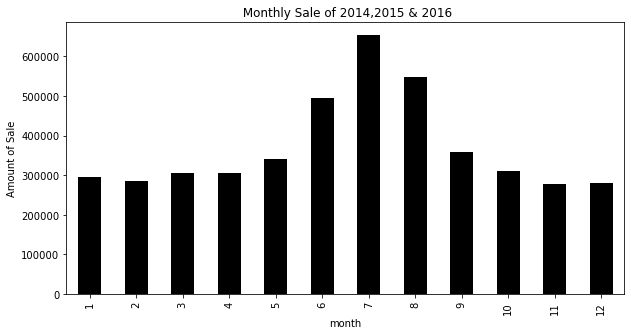

In [9]:
DataFrame['month'] = DataFrame['Date'].dt.month

sell_by_month = DataFrame.groupby('month')['Count'].sum()
sell_by_month

plt.figure(figsize=(10,5))
plt.title(' Monthly Sale of 2014,2015 & 2016')
plt.ylabel('Amount of Sale')
DataFrame.groupby('month').Count.sum().plot(kind='bar',color='black')

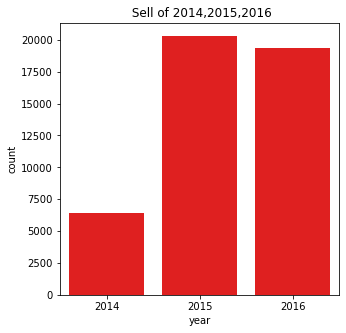

In [12]:
DataFrame['year'] = DataFrame['Date'].dt.year

sell_by_year = DataFrame.groupby('year')['Count'].sum()
sell_by_year

plt.figure(figsize=(5,5))
plt.title(' Sell of 2014,2015,2016')
sns.countplot(x='year', data=DataFrame, color='red');

C:\Users\SADMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


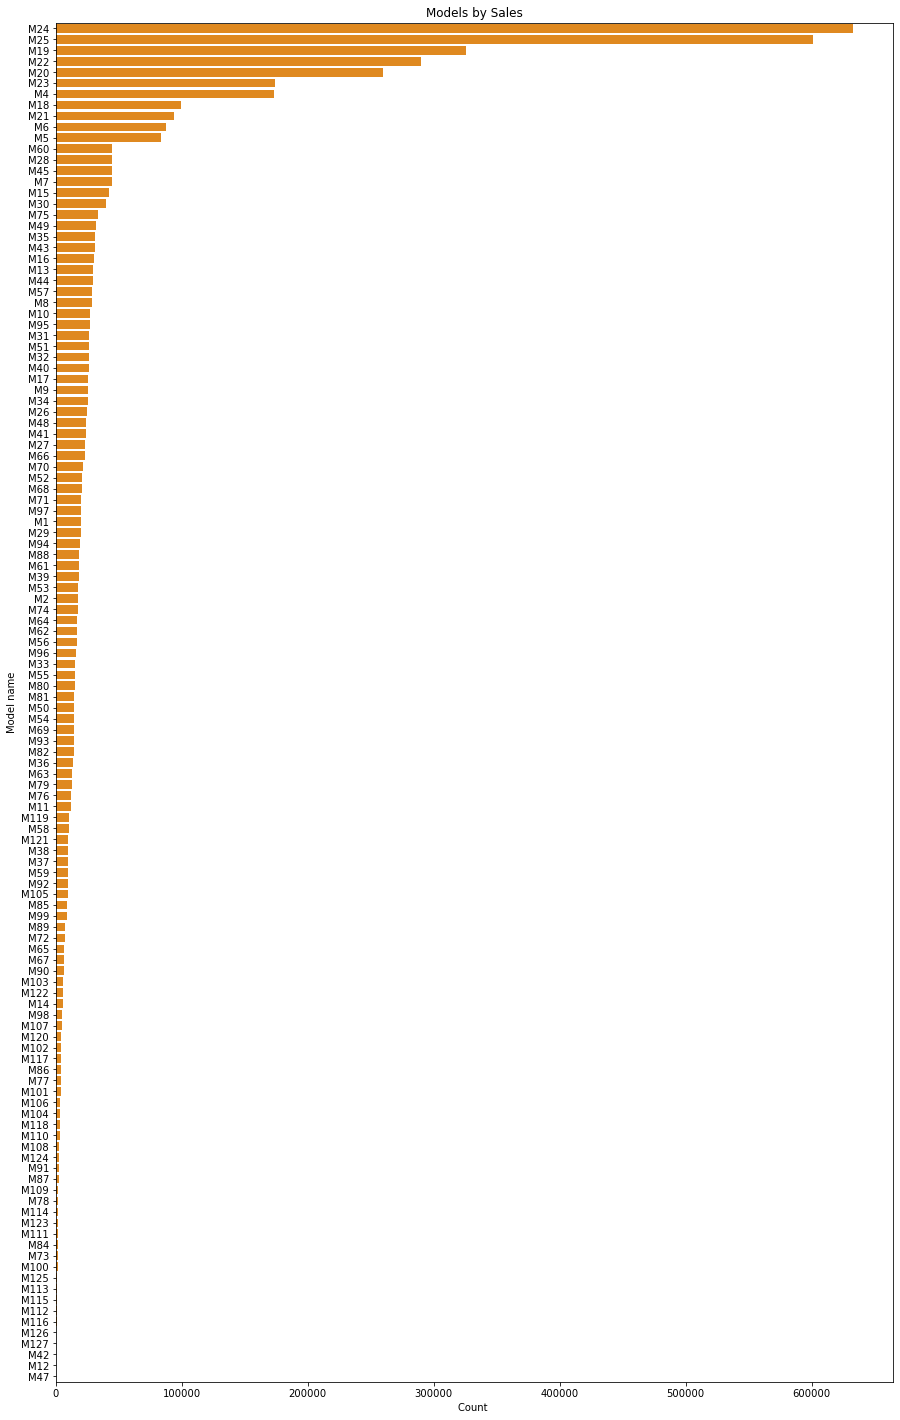

In [26]:
models_by_sale = DataFrame.groupby('Model')['Count'].sum()
models_by_sale.sort_values(axis=0, ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(15, 25))
ax=sns.barplot(models_by_sale, models_by_sale.index,orient='h', color='darkorange')
ax.set(title='Models by Sales',xlabel='Count ', ylabel='Model name')
plt.show()

In [27]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
DataFrame["Model_code"] =encoder.fit_transform(DataFrame[["Model"]])
DataFrame[["Model", "Model_code"]]

,Model,Model_code
0,M45,66.0
1,M121,25.0
2,M122,26.0
3,M91,115.0
4,M66,88.0
...,...,...
46111,M74,97.0
46112,M59,80.0
46113,M60,82.0
46114,M54,75.0


In [36]:
correlation = DataFrame.corr(method='pearson')
columns = correlation.nlargest(10, 'Count').index
columns

Index(['Count', 'qrtr_3', 'month_7', 'year', 'year_2016', 'dayofyear',
       'weekofyear', 'month', 'month_6', 'month_8'],
      dtype='object')

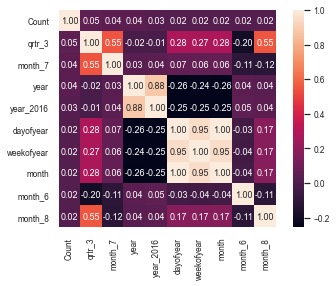

In [40]:
corr_graph = np.corrcoef(DataFrame[columns].values.T)
sns.set(font_scale=0.75)
heatmap = sns.heatmap(corr_graph, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [41]:
x = DataFrame[['qrtr_3', 'month_7', 'year_2016', 'dayofyear', 'weekofyear',
       'month_6', 'month_8', 'month_9', 'year_2015']]
y = DataFrame['Count']

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [50]:
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred = regressor_MultiLinear.predict(x_train)
print(" MAE :", mean_absolute_error(y_train, y_pred))
print(" RMSE :", sqrt(mean_squared_error(y_train, y_pred)))
print(" R2 : ", r2_score(y_train, y_pred))

 MAE : 125.57739430991067
 RMSE : 314.6358143278659
 R2 :  0.007033147875259549


In [52]:
y_pred = regressor_MultiLinear.predict(x_test)
print(" MAE :", mean_absolute_error(y_test, y_pred))
print(" RMSE :", sqrt(mean_squared_error(y_test, y_pred)))
print(" R2 :", r2_score(y_test, y_pred))

 MAE : 126.51164212303084
 RMSE : 312.0648695180369
 R2 : 0.005943793623843119
